In [101]:
# CAP 5415 Programming Assignment 05: Binarization for Image Segmentation

"""

In this assignment, the goal is to implement Otsu Thresholding to perform image segmentation.

Tasks:

    1. First implement a simple thresholding based image binarization algorithm. 
        a. Plot the histogram for 3 different input images.
        b. Based on the plot, perform binarization at 3 different threshold levels.

    2. Implement Otsu Thresholding. Use the determined threshold to perform segmentation on three input images.

"""

'\n\nIn this assignment, the goal is to implement Otsu Thresholding to perform image segmentation.\n\nTasks:\n\n    1. First implement a simple thresholding based image binarization algorithm. \n        a. Plot the histogram for 3 different input images.\n        b. Based on the plot, perform binarization at 3 different threshold levels.\n\n    2. Implement Otsu Thresholding. Use the determined threshold to perform segmentation on three input images.\n\n'

In [102]:
# Import packages

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import cv2 as cv


input_folder = "Input_Images"


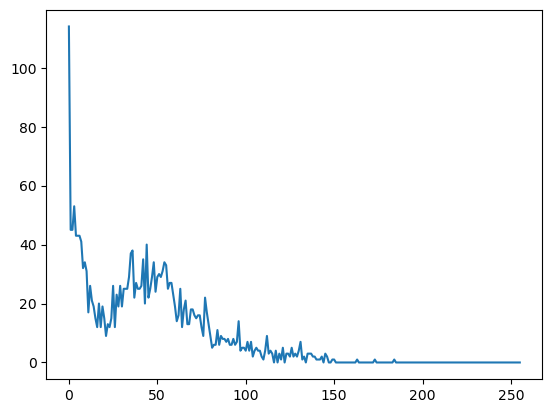

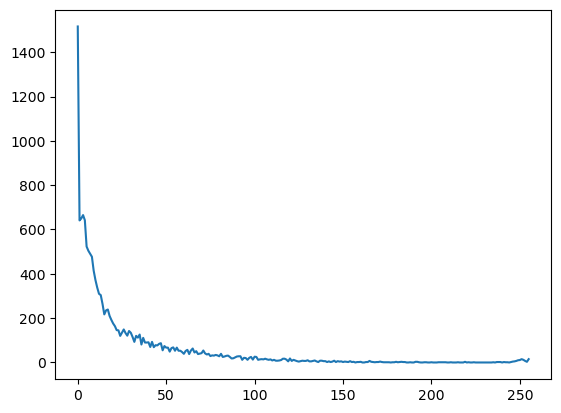

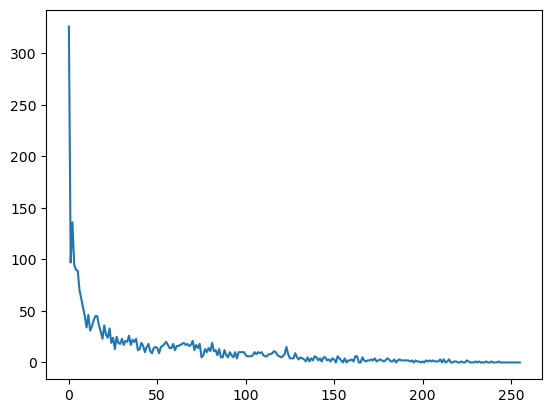

In [103]:
# Get Histogram subplots for 3 input images.

input_images_array= Path(input_folder).glob('*.jpeg')


   
for image in input_images_array:
    
    im = plt.imread(str(image))
    histogram = cv.calcHist(im,[0],None,[256],[0,256])
    plt.plot(histogram)
    plt.show()


In [104]:
# Create Algorithm for Thresholding Image 

def convert_binary(image_matrix, thresh_val):
    white = 255
    black = 0
    
    initial_conv = np.where((image_matrix <= thresh_val), image_matrix, white)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, black)
    
    return final_conv

In [105]:
# Create Algorithm for Binarizing an image

def binarize_image(image, thresh_val=127, with_plot=False, gray_scale=False):

    im=image
    
    if not gray_scale:
        cmap_val = None
        r_img, g_img, b_img = im[:, :, 0], im[:, :, 1], im[:, :, 2]
        
        r_b = convert_binary(image_matrix=r_img, thresh_val=thresh_val)
        g_b = convert_binary(image_matrix=g_img, thresh_val=thresh_val)
        b_b = convert_binary(image_matrix=b_img, thresh_val=thresh_val)
        
        image_b = np.dstack(tup=(r_b, g_b, b_b))
    else:
        cmap_val = 'gray'
        image_b = convert_binary(image_matrix=im, thresh_val=thresh_val)
    
    if with_plot:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text("Binarized")
        
        ax1.imshow(im, cmap=cmap_val)
        ax2.imshow(image_b, cmap=cmap_val)
        return True
    return image_b

In [106]:
# Loop through folder and generate binarize images

# Based on Histograms, set a threshold value
threshold = [50,100,150]

input_images_array= Path(input_folder).glob('*.jpeg')
output_array = []

for image in input_images_array:
        for i in threshold:
                # Load image, load the filename and convert the image to an array.
                filename = os.path.basename(image).split('.',1)[0]
                im = Image.open(image).convert("L")
                im = np.asarray(im)
                im_filtered = binarize_image(image=im,thresh_val=i,gray_scale=True)
                output_array.append([im_filtered,i])


                
                # Save the Edged X-Direction images into the folder directory named "02_Gradient_Edge_Detection_X"  
                plt.imsave(f"Output_Images/{filename}_binarized_threshold_{i}.png",
                        im_filtered.astype(np.uint8),
                        cmap=plt.cm.Greys_r
                )


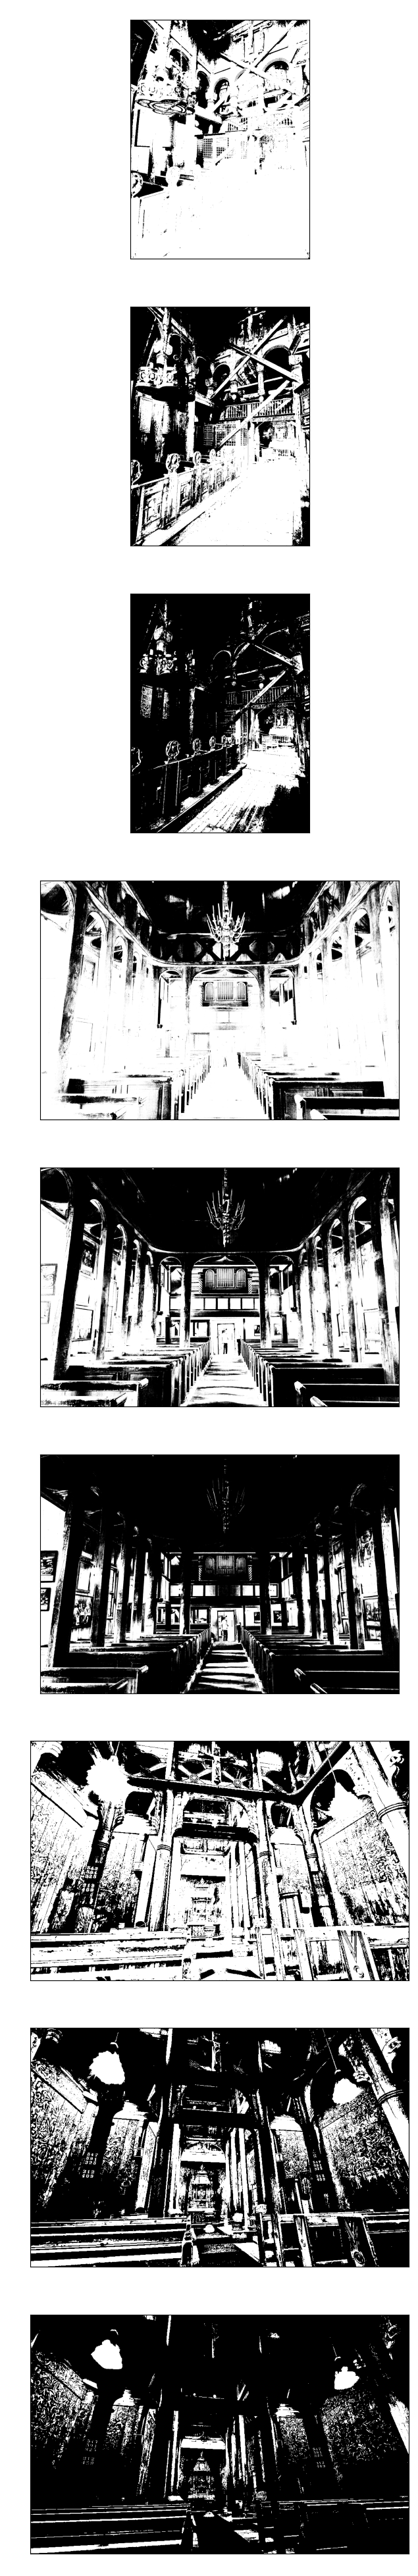

In [116]:
# Show Binarized Images

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(len(output_array),1, figsize=(50,50))
f.patch.set_alpha(0.1)


for i,image in enumerate(output_array):
   axarr[i].tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
   axarr[i].set_title(f"Threshold= {image[1]}",{'color': 'white'})
   axarr[i].imshow(image[0],cmap=plt.cm.Greys_r)